# Auto Insurance
L’objectif du projet est de construire un code structuré et fonctionnel en python. Ce code doit permettre de faire une prédiction sur le jeu de données Auto Insurance disponible sur https://www.kaggle.com/c/auto-insurance-fall-2017/data qui a pour cible TARGET_FLAG. Ce code devra donner explicitement la valeur de la performance des algorithmes employés avec une métrique adaptée et produire un fichier au format csv avec les prédictions.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 40)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier

In [2]:
%config Completer.use_jedi = False

On importe le dataset d'entrainement.

In [3]:
df_auto = pd.read_csv('auto-insurance-fall-2017/train_auto.csv', index_col=0)

## Preprocessing

In [4]:
df_auto.shape

(8161, 25)

Le dataset comprend 24 variables explicatives et 1 varaible à prédire : TARGET_FLAG.  
Il comprend également 8161 individus. 

In [5]:
df_auto.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [6]:
df_auto.describe(include='all')

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716,8161,7697,8161,8161,8161,7635,8161.000000,8161,8161,8161.000000,8161,8161,8161,8161.000000,8161,8161.000000,7651.000000,8161
unique,NaN,NaN,NaN,NaN,NaN,NaN,6612,2,5106,2,2,5,8,NaN,2,2789,NaN,6,2,2857,NaN,2,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,NaN,Private,"$1,500",NaN,z_SUV,no,$0,NaN,No,NaN,NaN,Highly Urban/ Urban
freq,NaN,NaN,NaN,NaN,NaN,NaN,615,7084,2294,4894,4375,2330,1825,NaN,5132,157,NaN,2294,5783,5009,NaN,7161,NaN,NaN,6492
mean,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.485725,NaN,NaN,5.351305,NaN,NaN,NaN,0.798554,NaN,1.695503,8.328323,NaN
std,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.908333,NaN,NaN,4.146635,NaN,NaN,NaN,1.158453,NaN,2.147112,5.700742,NaN
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,-3.000000,NaN
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,8.000000,NaN
75%,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,7.000000,NaN,NaN,NaN,2.000000,NaN,3.000000,12.000000,NaN


La variable à prédire TARGET_AMT n'est pas utilisée dans ce projet et est donc supprimée.

In [7]:
df_auto.drop(columns='TARGET_AMT', inplace=True)

### Feature types

On vérifie que les types des varaibles sont les bons.

In [8]:
df_auto.dtypes

TARGET_FLAG      int64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

Les variables avec des dollars représentant des sommes n'ont pas le bon type car les sommes sont reconnues comme des string et non comme des float. Il faut ainsi modifier ces colonnes pour obtenir des nombres et non des chaines de caractères.  
De plus, il faut changer les virgules dans ses colonnes en points pour que le changement de type de la colonne puisse être fait et que les sommes soient effectivement des nombres.

In [9]:
df_auto['INCOME'] = df_auto['INCOME'].str.replace('$', '', regex=False)
df_auto['INCOME'] = df_auto['INCOME'].str.replace(',', '.', regex=False).astype('float')
df_auto['HOME_VAL'] = df_auto['HOME_VAL'].str.replace('$', '', regex=False)
df_auto['HOME_VAL'] = df_auto['HOME_VAL'].str.replace(',', '.', regex=False).astype('float')
df_auto['BLUEBOOK'] = df_auto['BLUEBOOK'].str.replace('$', '', regex=False)
df_auto['BLUEBOOK'] = df_auto['BLUEBOOK'].str.replace(',', '.', regex=False).astype('float')
df_auto['OLDCLAIM'] = df_auto['OLDCLAIM'].str.replace('$', '', regex=False)
df_auto['OLDCLAIM'] = df_auto['OLDCLAIM'].str.replace(',', '.', regex=False).astype('float')

### Exploration des données

L'exploration des données nous montre les distributions des variables et nous renseigne sur le dataset.  
Pour les variables continues, l'histogramme est un bon outil pour visualiser la distribution tandis que pour les variables discrètes et quantitatives, un graphique en barre est adapté.

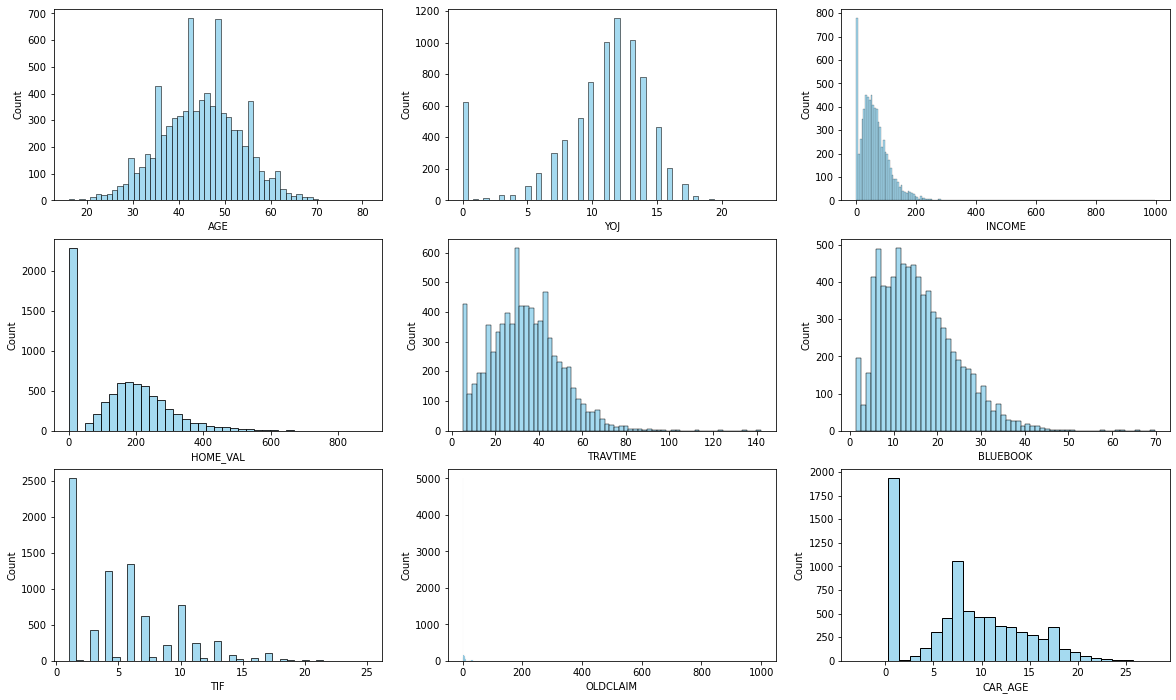

In [10]:
num_features = ['AGE', 'YOJ','INCOME','HOME_VAL','TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CAR_AGE']
f, axes = plt.subplots(3, 3, figsize=(20, 12))
for ax, feature in zip(axes.flat, num_features):
    sns.histplot(x=feature, data=df_auto, color="skyblue", ax=ax)

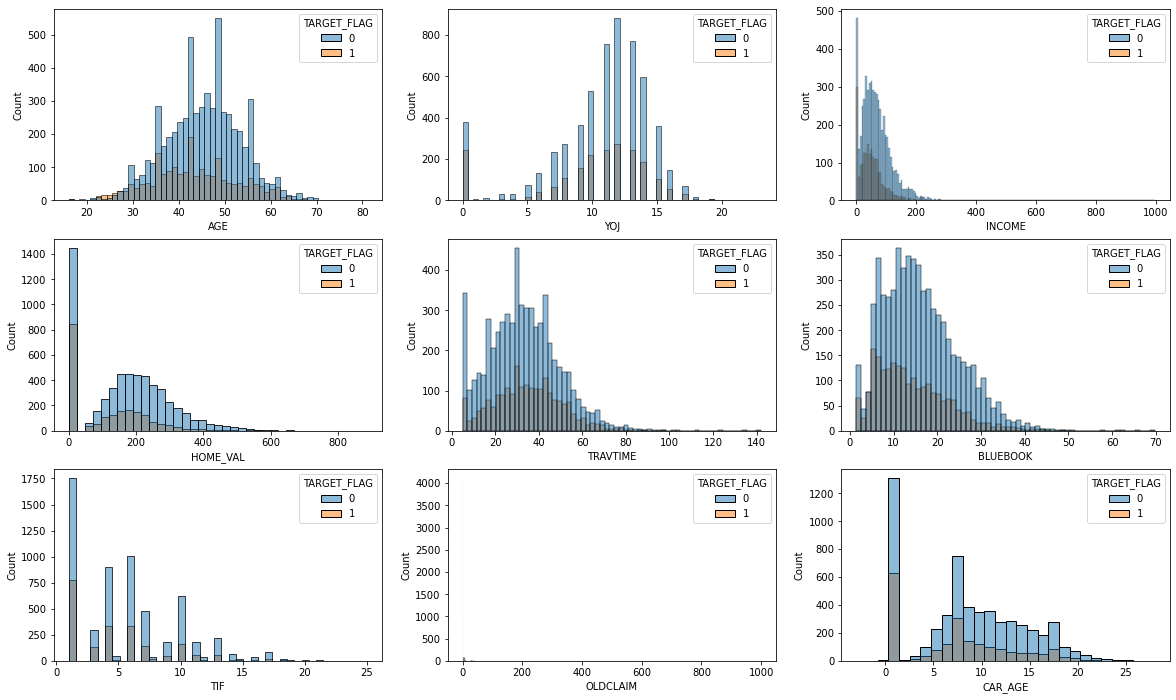

In [11]:
num_features = ['AGE', 'YOJ','INCOME','HOME_VAL','TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CAR_AGE']
f, axes = plt.subplots(3, 3, figsize=(20, 12))
for ax, feature in zip(axes.flat, num_features):
    sns.histplot(x=feature, hue='TARGET_FLAG', data=df_auto, color="skyblue", ax=ax)

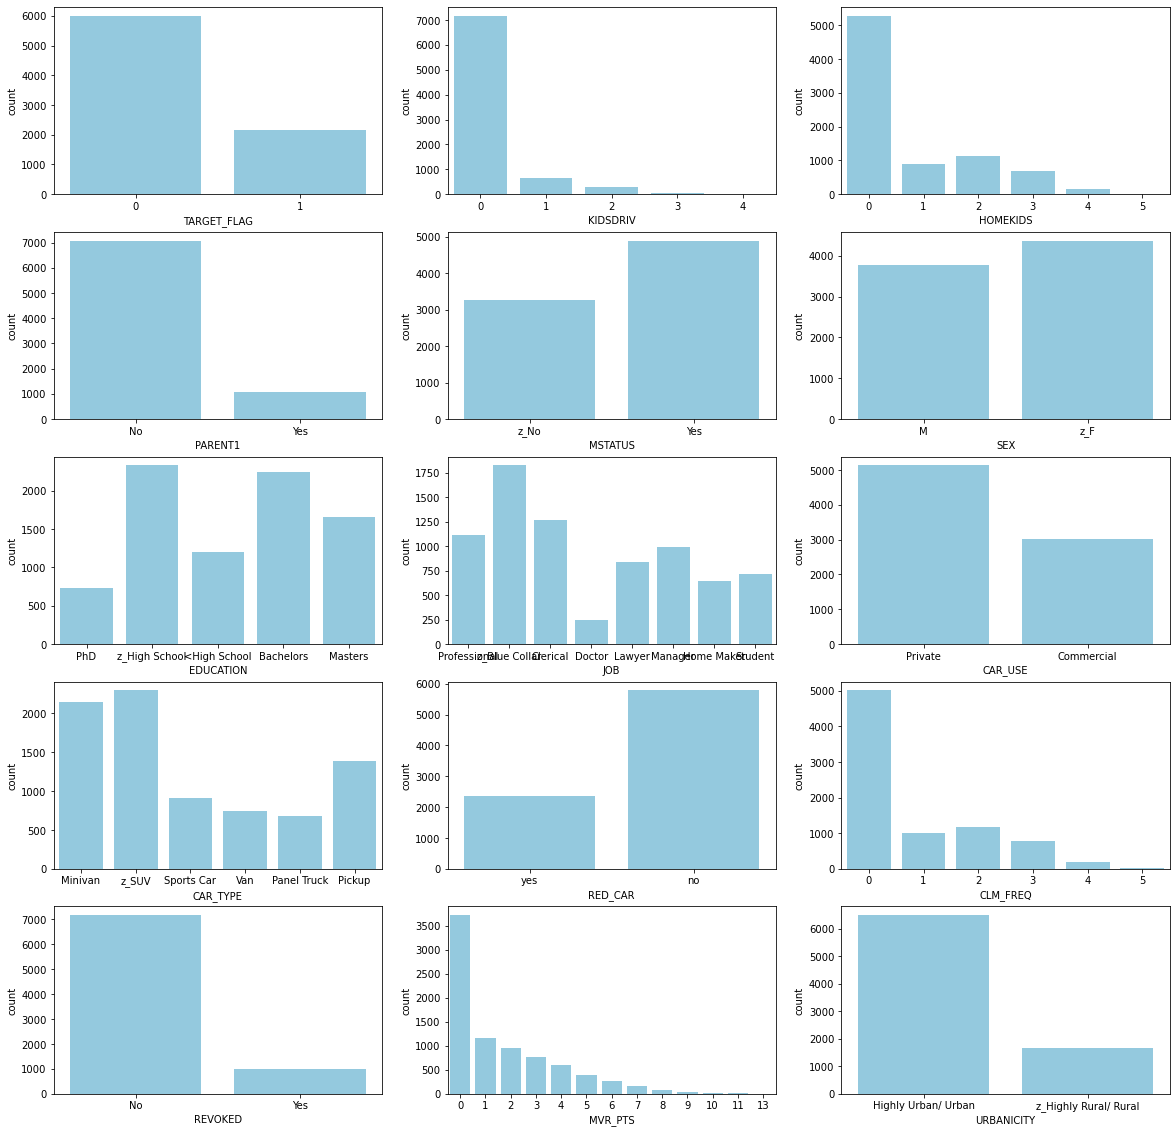

In [12]:
cat_features = ['TARGET_FLAG', 'KIDSDRIV','HOMEKIDS','PARENT1','MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE',
               'CAR_TYPE', 'RED_CAR', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'URBANICITY']
f, axes = plt.subplots(5, 3, figsize=(20, 20))
for ax, feature in zip(axes.flat, cat_features):
    sns.countplot(x=feature, data=df_auto , color="skyblue", ax=ax)

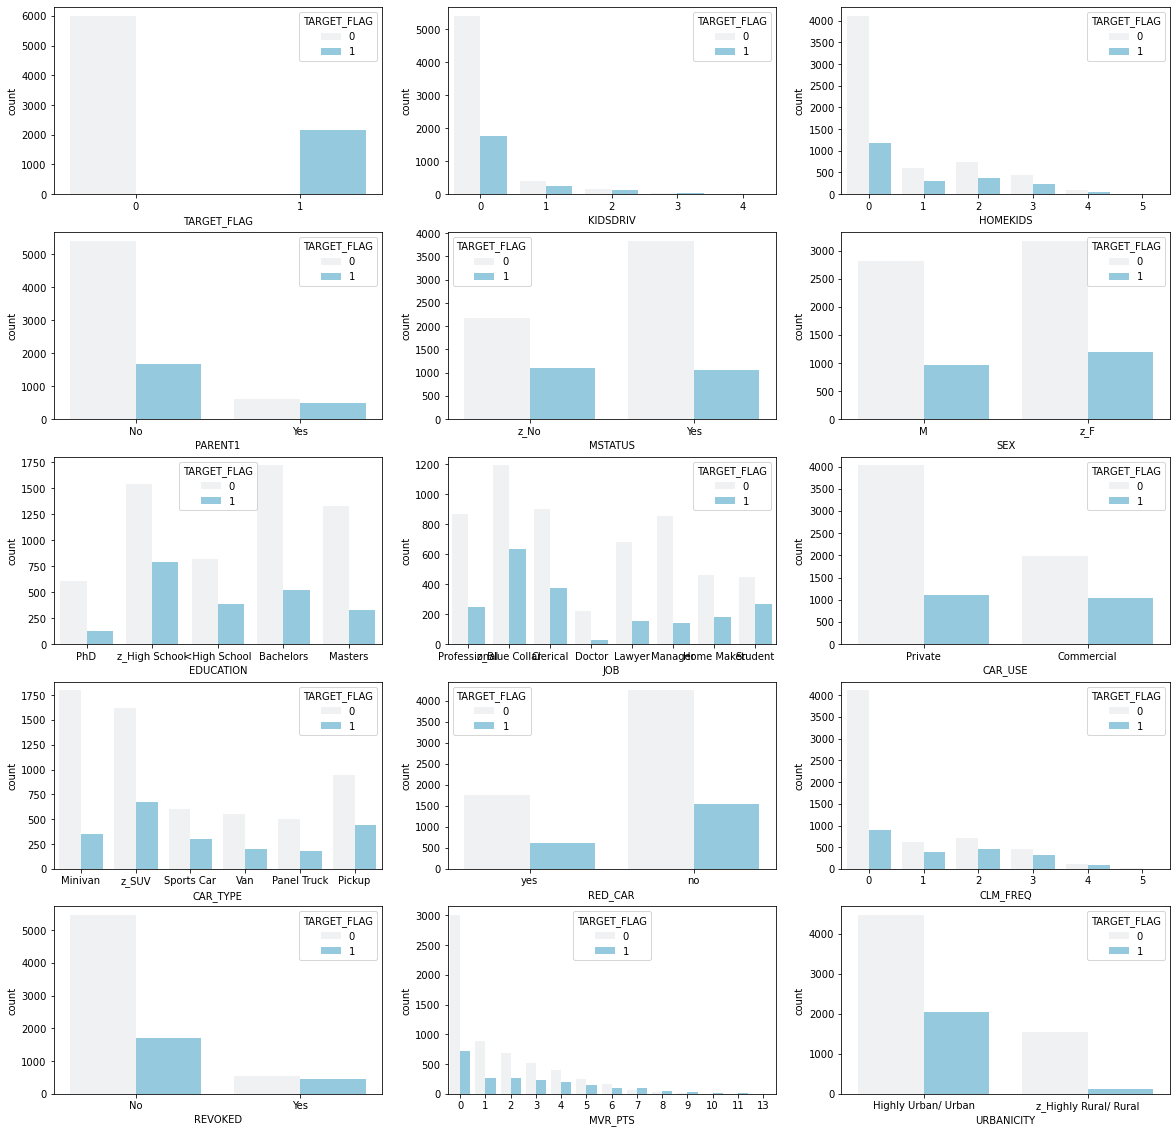

In [13]:
cat_features = ['TARGET_FLAG', 'KIDSDRIV','HOMEKIDS','PARENT1','MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE',
               'CAR_TYPE', 'RED_CAR', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'URBANICITY']
f, axes = plt.subplots(5, 3, figsize=(20, 20))
for ax, feature in zip(axes.flat, cat_features):
    sns.countplot(x=feature, hue='TARGET_FLAG', data=df_auto , color="skyblue", ax=ax)

### Data Cleaning

In [14]:
df_auto.isnull().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

De nombreux individus possèdent des valeurs manquantes et il faut traiter ce problème pour pouvoir entrainer les algorithmes par la suite. Supprimer chaque individu qui possède une valeur manquante réduirait trop la taille du dataset. De plus, le jeu de test possède également des valeurs manquantes et on ne peut pas supprimer des individus dans ce jeu de données.   
Les valeurs complétées pour les variables quantitatives sont la médiane de ces variables tandis que les valeurs complétées pour la variable qualitative sont la catégorie la plus représentée.   
     
C'est la méthode de complétion la plus simple mais d'autres méthodes existent comme l'utilisation de modèles de prédictions comme les Random Forest ou les KNN pour compléter les valeurs manquantes.   
De plus, il faudrait étudier si les valeurs manquantes sont systématiques chez un certain type d'individus. Dans le dataset, on pourrait par exemple penser que les individus avec une valeur manquante pour le revenu ne veulent pas indiquer un faible revenu.

In [15]:
age_median = df_auto['AGE'].median()
df_auto['AGE'].fillna(age_median, inplace=True)
yoj_median = df_auto['YOJ'].median()
df_auto['YOJ'].fillna(yoj_median, inplace=True)
income_median = df_auto['INCOME'].median()
df_auto['INCOME'].fillna(income_median, inplace=True)
home_val_median = df_auto['HOME_VAL'].median()
df_auto['HOME_VAL'].fillna(home_val_median, inplace=True)
car_age_median = df_auto['CAR_AGE'].median()
df_auto['CAR_AGE'].fillna(car_age_median, inplace=True)
job_most_values = df_auto['JOB'].value_counts().index.tolist()[0]
df_auto['JOB'].fillna(job_most_values, inplace=True)

In [16]:
df_auto.isnull().sum()

TARGET_FLAG    0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

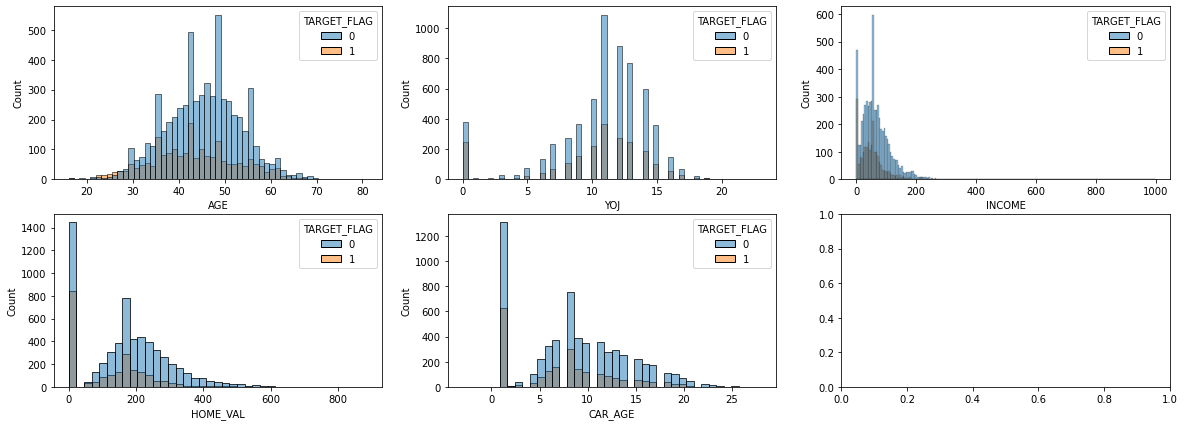

In [17]:
num_features = ['AGE', 'YOJ','INCOME','HOME_VAL', 'CAR_AGE']
f, axes = plt.subplots(2, 3, figsize=(20, 7))
for ax, feature in zip(axes.flat, num_features):
    sns.histplot(x=feature, hue='TARGET_FLAG', data=df_auto, color="skyblue", ax=ax)

<AxesSubplot:xlabel='JOB', ylabel='count'>

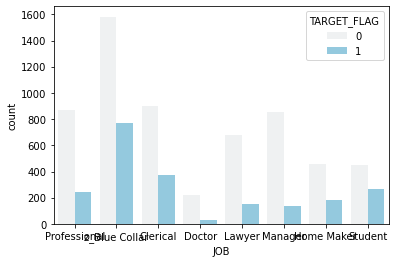

In [18]:
sns.countplot(x='JOB', hue='TARGET_FLAG', data=df_auto , color="skyblue")

Les distributions des variables qui ont été complétées sont différentes puisque les valeurs moyennes ont donc de nombreuses occurences et ont un poids plus important. Cependant, les changement de distributions ne semblent pas avoir trop d'impact sur les distributions par rapport à la variable à prédire.

### Dummies

Les variables qualitatives sont ensuite transformées en variables qualitatives en utilisant la méthode de pandas get_dummies. De nombreux algorithmes de prédictions ont en effet besoin de s'entrainer avec des variables quantitatives.

In [19]:
df_auto_final = pd.get_dummies(df_auto, drop_first=True)

In [20]:
df_auto_final.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_Yes,MSTATUS_z_No,SEX_z_F,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67.3490,0.000,14,14.23,11,4.461,2,3,18.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,43.0,0,11.0,91.4490,257.252,22,14.94,1,0.000,0,0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,35.0,1,10.0,16.0390,124.191,5,4.01,4,38.690,2,3,10.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,0,0,51.0,0,14.0,54.7995,306.251,32,15.44,7,0.000,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
6,0,0,50.0,0,11.0,114.9860,243.925,36,18.00,1,19.217,2,3,17.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


## Feature Selection

Il est possible de réduire le nombre de variables explicatives en sélectionnant celles qui permettent la meilleure discrimination entre les TARGET_FLAG:0 et les TARGET_FLAG:0.

L'utilisation des modèles ensemblistes permet d'obtenir l'importance de chaque variable dans les arbres qui constituent ces modèles et ainsi de sélectionner uniquement celles qui sont les plus significatives.

Les distributions des variables explicatives sont normalisées pour que les distributions de ces variables soient comparables pour certains algorithmes de classification.

## Modèles 

In [21]:
y = df_auto_final['TARGET_FLAG']
X = df_auto_final.drop(columns=['TARGET_FLAG'])

In [22]:
X_mean = X.mean()
X_std = X.std()
X = (X-X_mean) / X_std

Le jeu de données est divisé en deux sous-jeux : 
- Le jeu d'entrainement qui va permettre d'entrainer le modèle et notamment d'optimiser les hyperparamètres par cross-validation
- Le jeu de test qui va permettre d'évaluer l'efficacité du modèle optimisé sur de nouvelles données

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Oversampling

Les deux classes de la variable à prédire ne sont pas équilibrées et cela va réduire les performances des algorithmes : on va donc créer des individus de la classe la moins représentée pour obtenir deux classes équilibrées.

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
y_train.value_counts()

0    4819
1    1709
Name: TARGET_FLAG, dtype: int64

In [26]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [27]:
y_train.value_counts()

0    4819
1    4819
Name: TARGET_FLAG, dtype: int64

### Train

Les hyperparamètres des modèles sont optimisés par cross-validation sur le jeu d'entrainement. Cela évite de diviser le jeu de données en trois sous-jeux : jeu d'entrainement, jeu de test et jeu de validation.   
Les outils de mesure de l'efficacité du classifieur sont les suivants :
- L'accuracy qui est le nombre de bonnes prédictions sur le nombre totale de prédictions
- L'AUC (aire sous la courbe ROC) qui totalise les performances du classifieur pour différents seuils
- Les valeurs de précision, rappel et le f1-score qui est une combinaison de la précision et du rappel ainsi que la matrice de confusion qui indique de manière précise la capacité à classer correctement du modèle

In [28]:
def train_model(model, param_grid, scoring):
    """
    Fonction qui optimise les hyperparamètres, entraine le modèle et affiche l'évaluation du modèle """
    
    clf = GridSearchCV(model, param_grid, scoring=scoring, cv=5, verbose=True)
    clf.fit(X_train, y_train)
    print('Meilleur modèle :', clf.best_estimator_)
    
    y_pred = clf.predict(X_test)
    print('Précision :{:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('AUC :{:.2f}'.format(roc_auc_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [29]:
logreg = LogisticRegression()
param_grid_logreg = {'C' : [.2, .3, .4]}

In [30]:
svm = SVC()
param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'tol': [1e-3]} 

In [31]:
gaussian = GaussianNB()
param_grid_gaussian = {'var_smoothing': [1e-4, 1e-5, 1e-6]}

In [32]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(3, 7)}

In [33]:
mlp = MLPClassifier()
param_grid_mlp = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]}

In [34]:
gb = GradientBoostingClassifier()
param_grid_gb = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}

In [35]:
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [40, 50, 60], 
                 'min_samples_split': [40, 50, 60, 70], 
                 'max_features': ['auto'], 
                 'max_depth': [3, 4, 5, 6], 
                 'criterion': ['gini'], 
                 'bootstrap': [False]}

In [36]:
bagging = BaggingClassifier()
param_grid={'max_features': [0.85, 0.9, 0.95],
            'n_estimators': [3, 4, 5],
            'warm_start' : [False]}

In [37]:
et = ExtraTreesClassifier()
param_grid_ed = {'min_samples_leaf' : [11, 12, 13, 14]}

In [38]:
xgb = XGBClassifier() 
param_grid_xgb = {'n_estimators': [50, 70, 90], 
              'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [3, 4, 5]}

L'optimisation des hyperparamètres prend du temps et est couteux en ressources, on se contentera donc de tester les algorithmes dans leur configuration normale pour ne pas prendre trop de temps.

In [39]:
def train_model_bis(model):
    """
    Fonction qui entraine le modèle et affiche l'évaluation du modèle """
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Précision :{:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('AUC :{:.2f}'.format(roc_auc_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Précision :0.73
AUC :0.73
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1189
           1       0.50      0.74      0.60       444

    accuracy                           0.73      1633
   macro avg       0.69      0.73      0.70      1633
weighted avg       0.78      0.73      0.74      1633



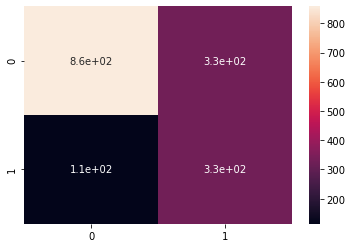

In [40]:
train_model_bis(logreg)

Précision :0.75
AUC :0.71
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1189
           1       0.53      0.63      0.57       444

    accuracy                           0.75      1633
   macro avg       0.69      0.71      0.70      1633
weighted avg       0.76      0.75      0.75      1633



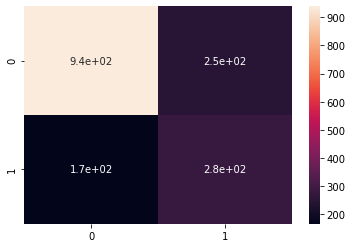

In [41]:
train_model_bis(svm)

Précision :0.72
AUC :0.72
              precision    recall  f1-score   support

           0       0.87      0.71      0.79      1189
           1       0.49      0.73      0.58       444

    accuracy                           0.72      1633
   macro avg       0.68      0.72      0.68      1633
weighted avg       0.77      0.72      0.73      1633



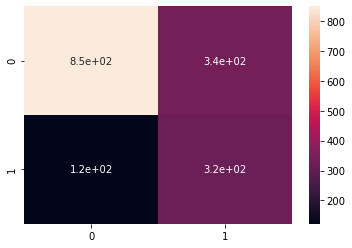

In [42]:
train_model_bis(gaussian)

Précision :0.67
AUC :0.66
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1189
           1       0.43      0.65      0.52       444

    accuracy                           0.67      1633
   macro avg       0.63      0.66      0.63      1633
weighted avg       0.73      0.67      0.68      1633



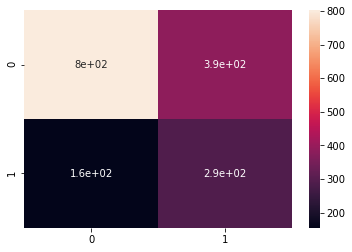

In [43]:
train_model_bis(knn)

C:\Users\matt0\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision :0.73
AUC :0.66
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1189
           1       0.51      0.50      0.50       444

    accuracy                           0.73      1633
   macro avg       0.66      0.66      0.66      1633
weighted avg       0.73      0.73      0.73      1633



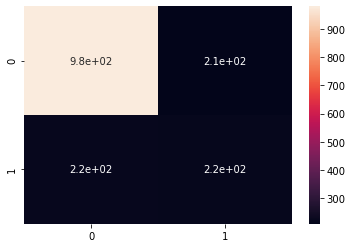

In [44]:
train_model_bis(mlp)

Précision :0.78
AUC :0.72
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1189
           1       0.60      0.57      0.59       444

    accuracy                           0.78      1633
   macro avg       0.72      0.72      0.72      1633
weighted avg       0.78      0.78      0.78      1633



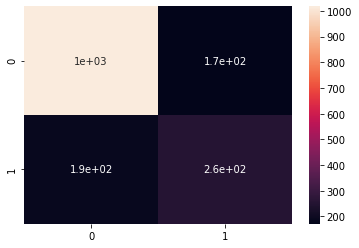

In [45]:
train_model_bis(gb)

Précision :0.78
AUC :0.68
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1189
           1       0.62      0.47      0.54       444

    accuracy                           0.78      1633
   macro avg       0.72      0.68      0.70      1633
weighted avg       0.77      0.78      0.77      1633



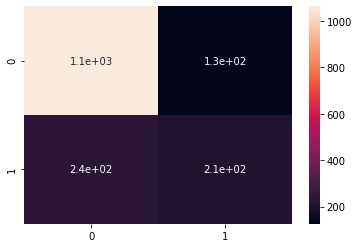

In [46]:
train_model_bis(rf)

Précision :0.76
AUC :0.65
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1189
           1       0.58      0.42      0.49       444

    accuracy                           0.76      1633
   macro avg       0.69      0.65      0.67      1633
weighted avg       0.74      0.76      0.75      1633



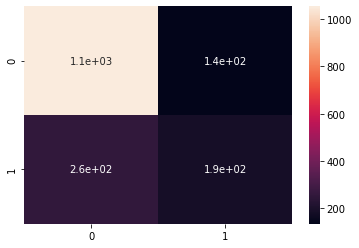

In [47]:
train_model_bis(bagging)

Précision :0.78
AUC :0.68
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1189
           1       0.62      0.46      0.53       444

    accuracy                           0.78      1633
   macro avg       0.72      0.68      0.69      1633
weighted avg       0.76      0.78      0.76      1633



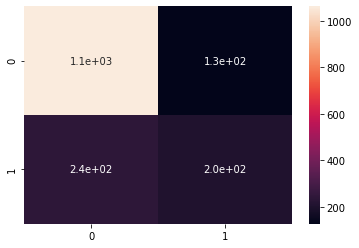

In [48]:
train_model_bis(et)

C:\Users\matt0\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Précision :0.78
AUC :0.69
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1189
           1       0.61      0.49      0.55       444

    accuracy                           0.78      1633
   macro avg       0.72      0.69      0.70      1633
weighted avg       0.77      0.78      0.77      1633



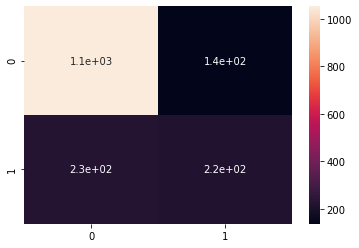

In [49]:
train_model_bis(xgb)

Le meilleur modèle sur ces premiers résultats est la régression logistique qui a une bonne accuracy et la meilleure aire sous la courbe ROC.

In [50]:
model_final = logreg

## Test dataset

In [51]:
df_test = pd.read_csv('auto-insurance-fall-2017/test_auto.csv', index_col=0)

In [52]:
df_test.drop(columns=['TARGET_AMT', 'TARGET_FLAG'], inplace=True)

In [53]:
df_test['INCOME'] = df_test['INCOME'].str.replace('$', '', regex=False)
df_test['INCOME'] = df_test['INCOME'].str.replace(',', '.', regex=False).astype('float')
df_test['HOME_VAL'] = df_test['HOME_VAL'].str.replace('$', '', regex=False)
df_test['HOME_VAL'] = df_test['HOME_VAL'].str.replace(',', '.', regex=False).astype('float')
df_test['BLUEBOOK'] = df_test['BLUEBOOK'].str.replace('$', '', regex=False)
df_test['BLUEBOOK'] = df_test['BLUEBOOK'].str.replace(',', '.', regex=False).astype('float')
df_test['OLDCLAIM'] = df_test['OLDCLAIM'].str.replace('$', '', regex=False)
df_test['OLDCLAIM'] = df_test['OLDCLAIM'].str.replace(',', '.', regex=False).astype('float')

In [54]:
df_test['AGE'].fillna(age_median, inplace=True)
df_test['YOJ'].fillna(yoj_median, inplace=True)
df_test['INCOME'].fillna(income_median, inplace=True)
df_test['HOME_VAL'].fillna(home_val_median, inplace=True)
df_test['CAR_AGE'].fillna(car_age_median, inplace=True)
df_test['JOB'].fillna(job_most_values, inplace=True)

In [55]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [56]:
df_test = (df_test-X_mean) / X_std

In [57]:
y_pred = model_final.predict(df_test)

In [58]:
df_pred = pd.DataFrame(y_pred, index=df_test.index)

In [59]:
df_pred[0].value_counts()

0    1214
1     927
Name: 0, dtype: int64

Le modèle a tendance a trop prédire une alerte et il faudrait modifier cette tendance qui augmente fortement les Faux Positifs mais qui tend à faire baisser les Faux Négatifs.

In [ ]:
df_pred.to_csv('...')